In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/280k_data/ack_h.csv')
data2=pd.read_csv('/content/drive/MyDrive/280k_data/benign_traffic_h.csv')
data3=pd.read_csv('/content/drive/MyDrive/280k_data/junk_h.csv')
data4=pd.read_csv('/content/drive/MyDrive/280k_data/scan_h.csv')
data5=pd.read_csv('/content/drive/MyDrive/280k_data/syn_h.csv')
data6=pd.read_csv('/content/drive/MyDrive/280k_data/tcp_h.csv')
data7=pd.read_csv('/content/drive/MyDrive/280k_data/udp_h.csv')
data8=pd.read_csv('/content/drive/MyDrive/280k_data/udpplain_h.csv')

In [ ]:
X=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8],axis=0 ,sort=False ,ignore_index=True)

In [ ]:
X

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
1,1.996585,566.000000,5.820000e-11,1.997950,566.000000,5.820000e-11,1.999316,566.000000,0.000000e+00,1.999932,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
2,2.958989,566.000000,0.000000e+00,2.975291,566.000000,5.820000e-11,2.991729,566.000000,5.820000e-11,2.999171,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
3,3.958979,566.000000,0.000000e+00,3.975285,566.000000,0.000000e+00,3.991727,566.000000,1.160000e-10,3.999171,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
4,4.914189,566.000000,1.160000e-10,4.948239,566.000000,5.820000e-11,4.982654,566.000000,5.820000e-11,4.998261,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279987,39.256165,504.003978,2.219839e+04,66.495961,426.545257,4.671683e+04,259.096457,328.198231,6.054598e+04,2788.201337,...,5.240000e-10,0.0,0.0,3132.118867,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279988,40.255905,505.245933,2.170751e+04,67.495697,428.433595,4.626179e+04,260.096115,329.066378,6.050847e+04,2789.200968,...,4.660000e-10,0.0,0.0,3133.118826,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279989,41.255606,506.427690,2.123756e+04,68.495396,430.266805,4.581322e+04,261.095728,329.927877,6.046976e+04,2790.200553,...,5.240000e-10,0.0,0.0,3134.118779,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279990,42.255469,507.553516,2.078725e+04,69.495260,432.047260,4.537113e+04,262.095555,330.782802,6.042988e+04,2791.200369,...,4.660000e-10,0.0,0.0,3135.118758,554.0,0.000039,554.0,1.510000e-09,0.0,0.0


#Using blobs to get organized output

Dataset Size :  (279992, 2) (279992,)


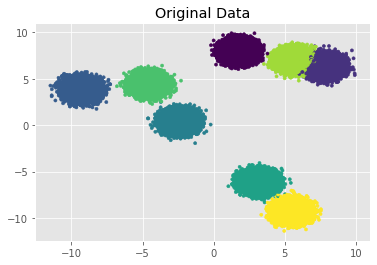

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X, y = make_blobs(n_samples=279992, centers=8, cluster_std=0.5,random_state=20)
print('Dataset Size : ',X.shape, y.shape)
with plt.style.context("ggplot"):
      plt.scatter(X[:,0],X[:,1], c = y, marker="o", s=10)
      plt.title("Original Data");

In [ ]:
from sklearn.decomposition import PCA

#Applying PCA to the dataset

In [ ]:
# Preprocessing the data to make it visualizable

# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal= pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()


,P1,P2
0,-0.951008,-0.172827
1,-0.060624,1.084892
2,-0.602179,-0.699536
3,0.979408,-0.174704
4,-0.541897,-0.743233


#PCA ON 8 Clusters

In [ ]:

# Building the clustering model
model = KMeans(n_clusters = 8)
  
# Training the model and Storing the predicted cluster labels
labels= model.fit_predict(X_principal)


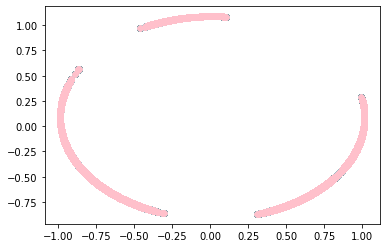

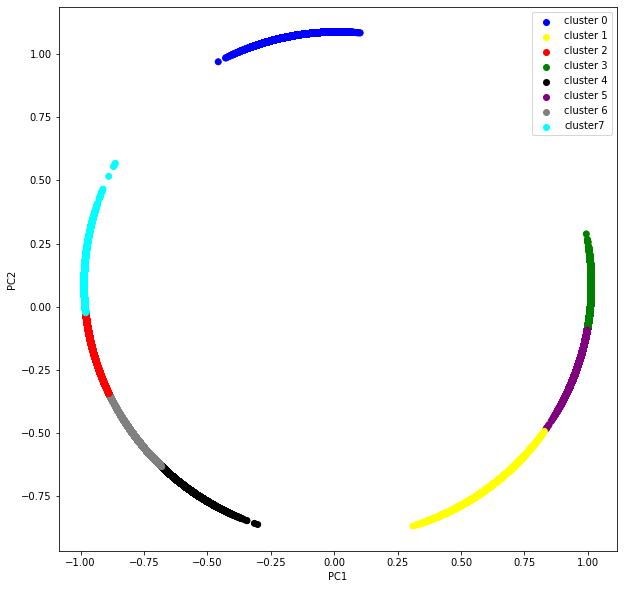

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'blue'
colours[1] = 'yellow'
colours[2] = 'red'
colours[3] = 'green'
colours[4] ='black'
colours[5] ='purple'
colours[6] ='grey'
colours[7]='cyan'
colours[8]='pink'


# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# Plotting the clustered scatter plot

blue = plt.scatter(X_principal['P1'], X_principal['P2'], color ='blue');
yellow = plt.scatter(X_principal['P1'], X_principal['P2'], color ='yellow');
red = plt.scatter(X_principal['P1'], X_principal['P2'], color ='red');
green = plt.scatter(X_principal['P1'], X_principal['P2'], color ='green');
black = plt.scatter(X_principal['P1'], X_principal['P2'], color ='black');
purple = plt.scatter(X_principal['P1'], X_principal['P2'], color ='purple');
grey = plt.scatter(X_principal['P1'], X_principal['P2'], color ='grey');
cyan = plt.scatter(X_principal['P1'], X_principal['P2'], color ='cyan');
pink = plt.scatter(X_principal['P1'], X_principal['P2'], color ='pink');
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend((blue, yellow,red,green,black,purple,grey,cyan,pink), ('cluster 0', 'cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6','cluster7'))
plt.show()


#calinski_harabasz evaluation

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_principal,labels)


7461385.697973652

#silhouette evaluation

In [ ]:
metrics.silhouette_score(X_principal,labels)

0.7522319235838759

#PCA on 6 clusters

In [ ]:

# Building the clustering model
model = KMeans(n_clusters = 6)
  
# Training the model and Storing the predicted cluster labels
labels= model.fit_predict(X_principal)

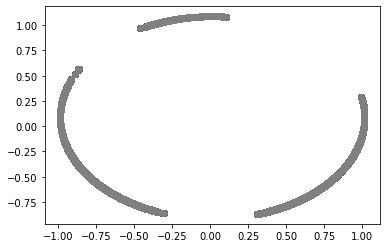

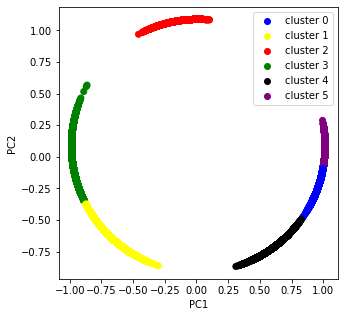

In [ ]:
colours = {}
colours[0] = 'blue'
colours[1] = 'yellow'
colours[2] = 'red'
colours[3] = 'green'
colours[4] ='black'
colours[5] ='purple'
colours[6] ='grey'



# Building the colour vector for each data point
cvec=[colours[label] for label in labels]

# Plotting the clustered scatter plot

blue = plt.scatter(X_principal['P1'], X_principal['P2'], color ='blue');
yellow = plt.scatter(X_principal['P1'], X_principal['P2'], color ='yellow');
red = plt.scatter(X_principal['P1'], X_principal['P2'], color ='red');
green = plt.scatter(X_principal['P1'], X_principal['P2'], color ='green');
black = plt.scatter(X_principal['P1'], X_principal['P2'], color ='black');
purple = plt.scatter(X_principal['P1'], X_principal['P2'], color ='purple');
grey = plt.scatter(X_principal['P1'], X_principal['P2'], color ='grey');

plt.figure(figsize =(5, 5))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend((blue, yellow,red,green,black,purple,grey,cyan,pink), ('cluster 0', 'cluster 1','cluster 2','cluster 3','cluster 4','cluster 5'))
plt.show()

#calinski_harabasz evaluation

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_principal,labels)

5549244.952582864

#silhouette evaluation

In [ ]:
metrics.silhouette_score(X_principal,labels)

0.800001689925367

#PCA on 4 clusters

In [ ]:
# Building the clustering model
model = KMeans(n_clusters = 4)
  
# Training the model and Storing the predicted cluster labels
labels= model.fit_predict(X_principal)

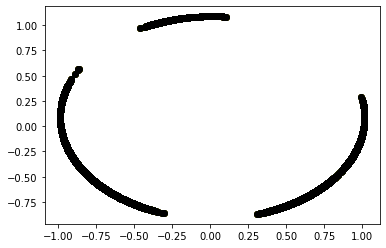

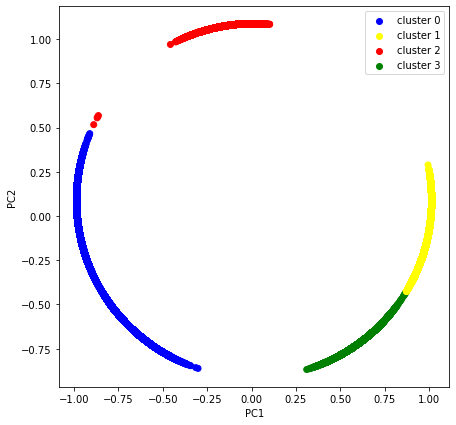

In [ ]:
colours = {}
colours[0] = 'blue'
colours[1] = 'yellow'
colours[2] = 'red'
colours[3] = 'green'
colours[4] ='black'




# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# Plotting the clustered scatter plot

blue = plt.scatter(X_principal['P1'], X_principal['P2'], color ='blue');
yellow = plt.scatter(X_principal['P1'], X_principal['P2'], color ='yellow');
red = plt.scatter(X_principal['P1'], X_principal['P2'], color ='red');
green = plt.scatter(X_principal['P1'], X_principal['P2'], color ='green');
black = plt.scatter(X_principal['P1'], X_principal['P2'], color ='black');


plt.figure(figsize =(7, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend((blue, yellow,red,green,black,purple,grey,cyan,pink), ('cluster 0', 'cluster 1','cluster 2','cluster 3'))
plt.show()

#calinski_harabasz evaluation

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_principal,labels)

1784952.4282710096

#Silhouette evaluation

In [ ]:
metrics.silhouette_score(X_principal,labels)

0.8039030545018329

#PCA ON 2 clusters

In [ ]:
# Building the clustering model
model = KMeans(n_clusters = 2)
  
# Training the model and Storing the predicted cluster labels
labels= model.fit_predict(X_principal)

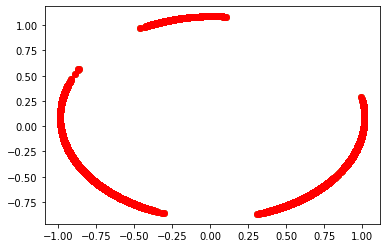

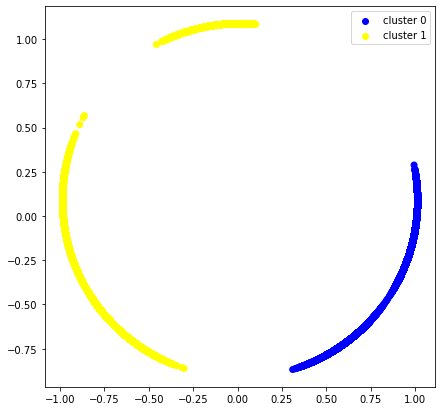

In [ ]:

colours = {}
colours[0] = 'blue'
colours[1] = 'yellow'
colours[2] = 'red'





# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# Plotting the clustered scatter plot

blue = plt.scatter(X_principal['P1'], X_principal['P2'], color ='blue');
yellow = plt.scatter(X_principal['P1'], X_principal['P2'], color ='yellow');
red = plt.scatter(X_principal['P1'], X_principal['P2'], color ='red');



plt.figure(figsize =(7, 7))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((blue, yellow,red,green,black,purple,grey,cyan,pink), ('cluster 0', 'cluster 1'))
plt.show()

#calinski_harabasz evaluation

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_principal,labels)

282291.1718952348

#silhouette evaluation

In [ ]:
metrics.silhouette_score(X_principal,labels)

0.5616605028496423